# Construindo um modelo de Regressão para Marketing

Imports de Bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns

## Tratamento dos dados

In [35]:
mkt = pd.read_csv('/content/MKT.csv')
mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


Verificar o formato (linhas e colunas)

In [ ]:
mkt.shape

Vizualizar informações gerais do dataframe


In [ ]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


Vizualização de Duplicados

In [ ]:
mkt.duplicated().sum()

np.int64(0)

Vizualização de Nulos

In [ ]:
mkt.isnull().sum()

,0
youtube,0
facebook,0
newspaper,0
sales,0


Descrição estatística das variáveis numéricas

In [ ]:
mkt.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
(mkt.isnull().sum() / mkt.shape[0]) * 100

,0
youtube,0.0
facebook,0.0
newspaper,0.0
sales,0.0


## Analise Descritiva

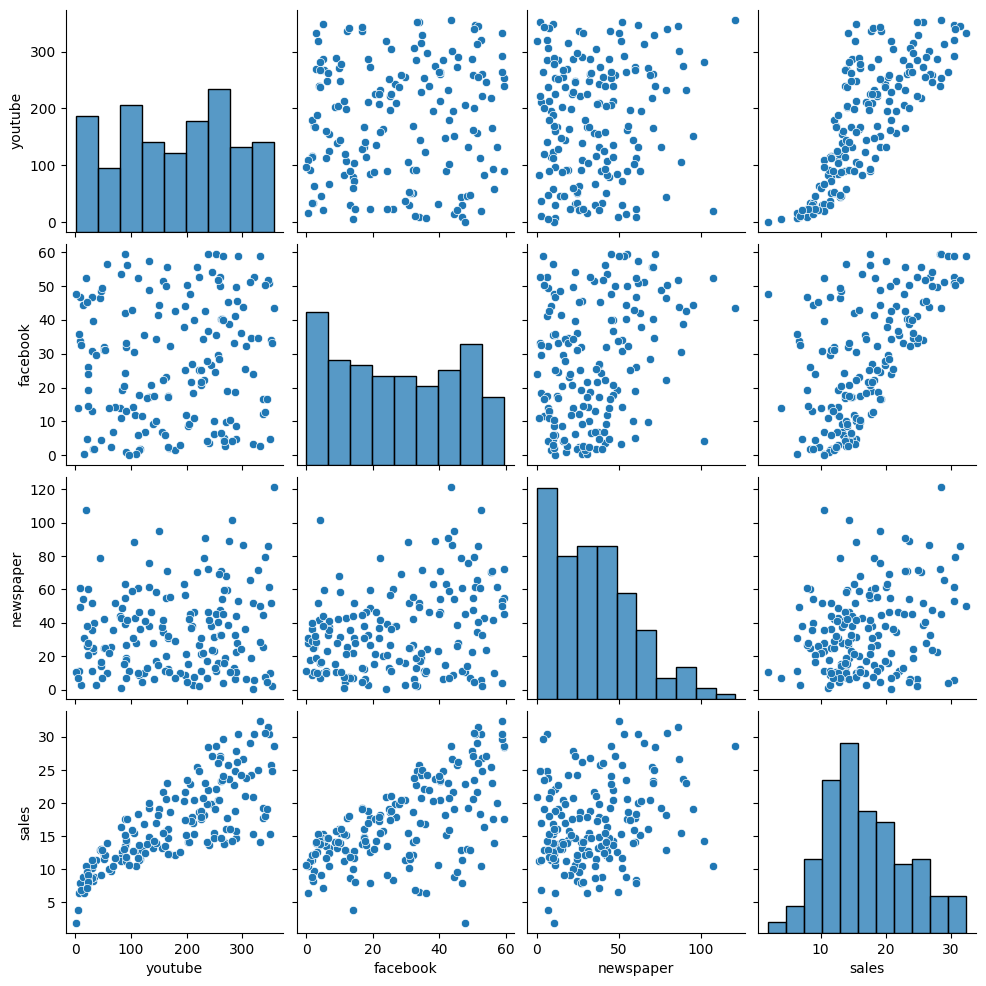

In [ ]:
import seaborn as sns
sns.pairplot(mkt)

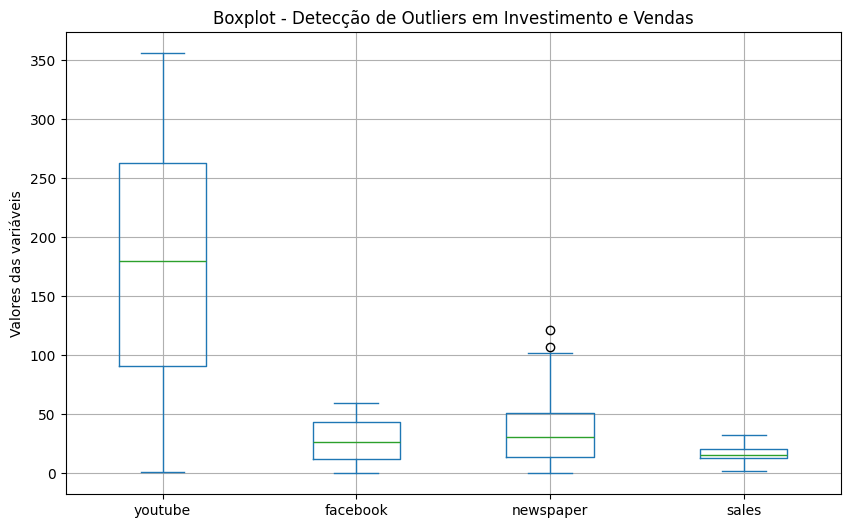

In [ ]:
import matplotlib.pyplot as plt

# Lista com as colunas desejadas
colunas = ['youtube', 'facebook', 'newspaper', 'sales']

# Criando o boxplot
mkt[colunas].plot(kind='box', figsize=(10, 6))
plt.title('Boxplot - Detecção de Outliers em Investimento e Vendas')
plt.ylabel('Valores das variáveis')
plt.grid(True)
plt.show()

In [ ]:
mkt.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [ ]:
mkt.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<Axes: xlabel='sales', ylabel='Count'>

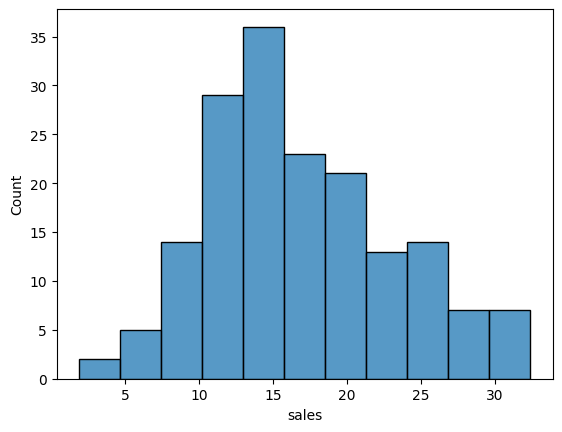

In [ ]:
sns.histplot(mkt['sales'])

<Axes: >

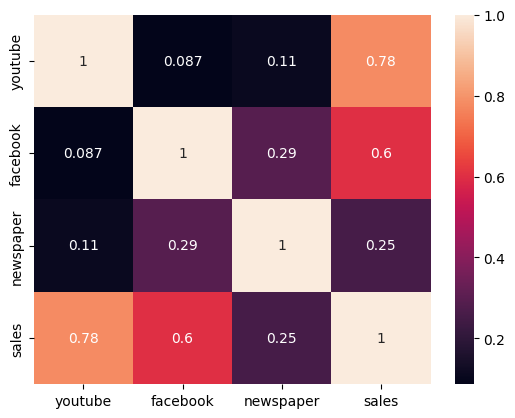

In [ ]:
sns.heatmap(mkt.corr(), annot=True)

## Analise Preditiva

In [ ]:
x = mkt[['youtube', 'facebook', 'newspaper' ]]

y = mkt[['sales']]

Separando treino e test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


Treinando modelo

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

print("Coeficientes:", lm.coef_)
print("Intercepto:", lm.intercept_)

Coeficientes: [[ 4.52186897e-02  1.88062758e-01 -1.35618526e-04]]
Intercepto: [3.6659818]


Predição

In [33]:
# Criando um DataFrame com os nomes corretos das colunas
novo_investimento_df = pd.DataFrame([[200, 30, 25]], columns=['youtube', 'facebook', 'newspaper'])

# Fazendo a previsão
previsao = lm.predict(novo_investimento_df)

print("Previsão de vendas:", previsao[0][0])

Previsão de vendas: 18.348212018011033


In [34]:
caso_real = mkt.iloc[10]
print(caso_real)

# Entrada com os dados de marketing
entrada = caso_real[['youtube', 'facebook', 'newspaper']].to_frame().T  # `.T` para transformar em linha

# Valor real de vendas
valor_real = caso_real['sales']

previsao = lm.predict(entrada)[0][0]


print(f"📊 Valor real de vendas: {valor_real}")
print(f"🤖 Valor previsto pelo modelo: {previsao:.2f}")
print(f"🧮 Erro: {abs(valor_real - previsao):.2f}")

youtube      273.60
facebook      45.24
newspaper     38.40
sales         25.80
Name: 10, dtype: float64
📊 Valor real de vendas: 25.8
🤖 Valor previsto pelo modelo: 24.54
🧮 Erro: 1.26
